<a href="https://colab.research.google.com/github/2021BUSTER/deep_learning_yeji/blob/main/14__wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#데이터 입력
from google.colab import files
uploaded = files.upload()
my_data = 'wine.csv'

!pip install -q tensorflow-gpu==1.15.0
%tensorflow_version 1.x
import tensorflow as tf
import pandas as pd
import numpy
import os

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

# seed 값 설정
numpy.random.seed(3)
tf.compat.v1.set_random_seed(3)

#데이터 적용
df_pre = pd.read_csv(my_data, header=None)
df = df_pre.sample(frac=0.15) #15% # frac = 1 원본데이터의 100%를 불러오라

# 데이터셋 보기
#print(dp.head(5))
#print(dp.info())

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 만들기
MODEL_DIR = './model/'            # 모델을 저장하는 폴더
if not os.path.exists(MODEL_DIR): # 폴더가 기존에 만들어져있지 않으면 폴더 만들기
   os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)    # 테스트 오차 :val_loss, 테스트셋 정확도 : val_acc , 학습셋 오차 : loss, 학습 정확도 : acc
                                                                                                          # 모델이 저장될 곳을 앞서 만든 modelpath로 지정하고
                                                                                                          # verbose = 1 : 해당 함수의 진행 사항 출력 , 0 : 출력하지 않음  
                               
# 그래프로 확인하기
# 모델 실행 저장
history=model.fit(X,Y,validation_split=0.33,epochs=3500,batch_size=500) # 배치크기를 500으로 늘려 한 번 딥러닝을 가동할 때 더 많이 입력되게끔
                                                                        # 불러온 샘플 중 33%는 분리하여 테스트셋으로 사용
y_vloss=history.history['val_loss']   # y_vloss에 테스트셋으로 실험결과의 오차 값을 저장
y_acc=history.history['accuracy']  # y_acc에 학습셋으로 측정한 정확도의 값을 저장

# x값을 지정하고 정확도를 파란색으로 , 오차를 빨간색으로 표시
x_len=numpy.arange(len(y_acc))
plt.plot(x_len,y_vloss,"o",c="red",markersize=3)
plt.plot(x_len,y_acc,"o",c="blue",markersize=3)

plt.show()

                                                                           # save_best_only = True : 앞서 저장한 모델보다 나아졌을 때만 폴더에 저장

# # 학습 자동 중단 설정
# early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)             # 학습이 진행될수록 정확도는 올라가지만 과적합때ㅐ문에 테스트셋의 실험 결과는 나빠짐
#                                                                                       # -> 테스트셋 오차가 줄지 않으면 멈추게 하는 함수 : EarlyStopping
#                                                                                       # 함수에 모니터할 값과 테스트 오차가 좋아지지 않아도 몇 번까지 기다릴 지 정해 early_stopping_callback에 저장

# model.fit(X, Y, validation_split=0.2, epochs=3500, batch_size=500, verbose=0, callbacks=[early_stopping_callback,checkpointer])



Saving wine.csv to wine (4).csv
Train on 653 samples, validate on 322 samples
Epoch 1/3500
653/653 [==============================] - 0s 455us/step - loss: 1.2707 - accuracy: 0.7259 - val_loss: 0.9180 - val_accuracy: 0.7547
Epoch 2/3500
653/653 [==============================] - 0s 19us/step - loss: 1.1131 - accuracy: 0.7259 - val_loss: 0.7865 - val_accuracy: 0.7547
Epoch 3/3500
653/653 [==============================] - 0s 24us/step - loss: 0.9417 - accuracy: 0.7259 - val_loss: 0.6698 - val_accuracy: 0.7547
Epoch 4/3500
653/653 [==============================] - 0s 20us/step - loss: 0.7961 - accuracy: 0.7259 - val_loss: 0.5732 - val_accuracy: 0.7547
Epoch 5/3500
653/653 [==============================] - 0s 21us/step - loss: 0.6736 - accuracy: 0.7259 - val_loss: 0.4936 - val_accuracy: 0.7547
Epoch 6/3500
653/653 [==============================] - 0s 25us/step - loss: 0.5792 - accuracy: 0.7259 - val_loss: 0.4321 - val_accuracy: 0.7547
Epoch 7/3500
653/653 [=============================

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1001/3500
653/653 [==============================] - 0s 31us/step - loss: 0.0411 - accuracy: 0.9847 - val_loss: 0.0855 - val_accuracy: 0.9720
Epoch 1002/3500
653/653 [==============================] - 0s 31us/step - loss: 0.0415 - accuracy: 0.9832 - val_loss: 0.0825 - val_accuracy: 0.9720
Epoch 1003/3500
653/653 [==============================] - 0s 24us/step - loss: 0.0429 - accuracy: 0.9816 - val_loss: 0.0822 - val_accuracy: 0.9720
Epoch 1004/3500
653/653 [==============================] - 0s 32us/step - loss: 0.0413 - accuracy: 0.9832 - val_loss: 0.0853 - val_accuracy: 0.9752
Epoch 1005/3500
653/653 [==============================] - 0s 28us/step - loss: 0.0417 - accuracy: 0.9816 - val_loss: 0.0847 - val_accuracy: 0.9752
Epoch 1006/3500
653/653 [==============================] - 0s 25us/step - loss: 0.0403 - accuracy: 0.9816 - val_loss: 0.0819 - val_accuracy: 0.9783
Epoch 1007/3500
653/653 [==============================] - 0s 31us/step - lo

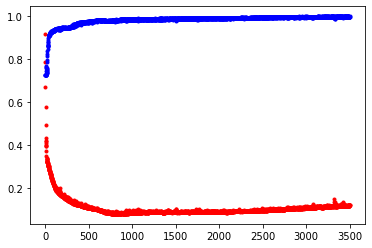

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
import tensorflow as tf
my_data = 'wine.csv'

# seed 값 설정
numpy.random.seed(3)
tf.compat.v1.set_random_seed(3)

df_pre = pd.read_csv(my_data, header=None)
df = df_pre.sample(frac=0.15)  # 전체 샘플 중 15%만 불러옴

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
# 모델 학습과정을 history에 저장
# batch_size는 한번 딥러닝 가동될 때 입력하는 크기
# validation_split : 불러온 샘플 중 33%를 테스트셋으로 사용
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
# 'acc'를 'accuracy'로 변경.
y_acc=history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()